In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


ModuleNotFoundError: No module named 'ace_tools'


Summary Statistics:
         created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000  


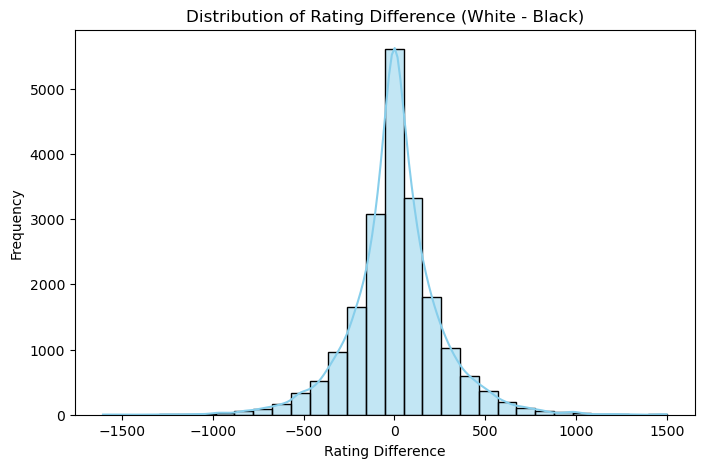

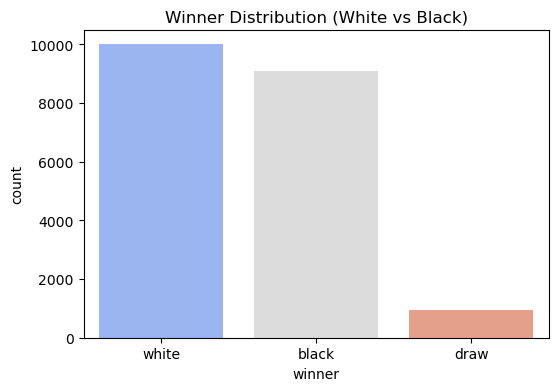

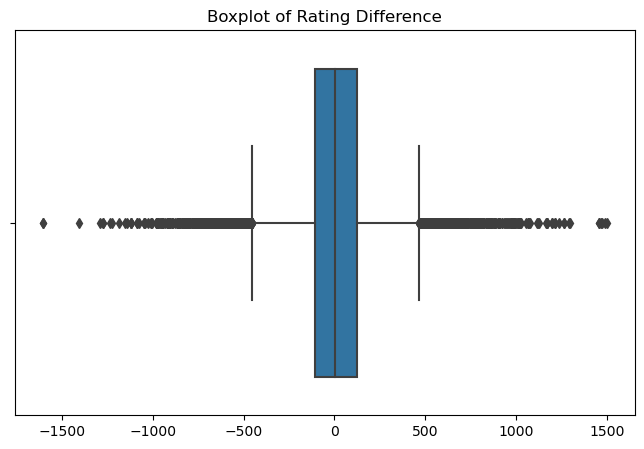

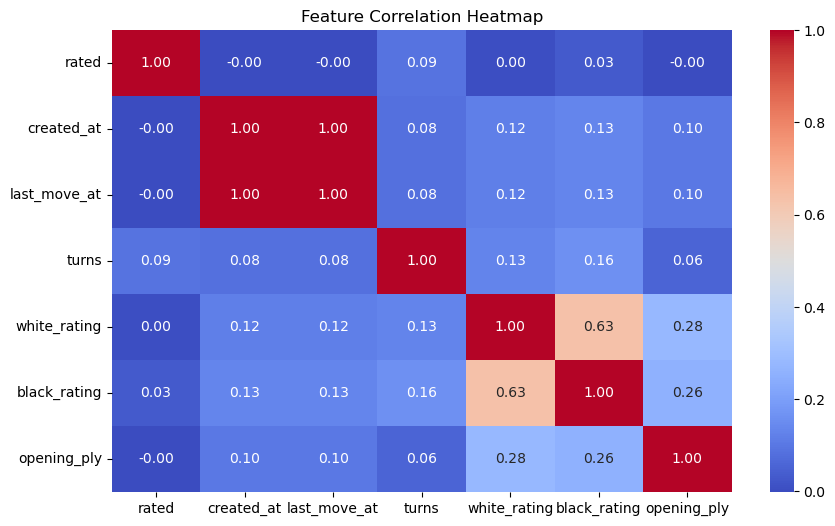

In [13]:
# Exploration Data Anylysis
# Load the dataset
df = pd.read_csv("C:\Machine Learning\DS3001_Midterm\games.csv")

# Drop rows with missing values (if minimal)
df = df.dropna()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Distribution of rating difference
plt.figure(figsize=(8, 5))
sns.histplot(df['white_rating'] - df['black_rating'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Rating Difference (White - Black)")
plt.xlabel("Rating Difference")
plt.ylabel("Frequency")
plt.show()

# Countplot of winner distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['winner'], palette="coolwarm")
plt.title("Winner Distribution (White vs Black)")
plt.show()

# Boxplot to check for outliers in rating differences
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['white_rating'] - df['black_rating'])
plt.title("Boxplot of Rating Difference")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Data Preprocessing
df = df[df['winner'] != 'draw']  # Remove draws

# Convert categorical variables to numerical
df['winner_binary'] = df['winner'].map({'white': 1, 'black': 0})  # Convert winner to binary


# Feature Engineering
df['rating_diff'] = df['white_rating'] - df['black_rating']
df['num_moves'] = df['moves'].str.count(' ') + 1  # Counting moves

# Encode top 10 most frequent openings
top_openings = df['opening_name'].value_counts().nlargest(10).index
df['opening_simplified'] = df['opening_name'].apply(lambda x: x if x in top_openings else 'Other')

# One-hot encode the top 10 openings
df = pd.get_dummies(df, columns=['opening_simplified'], drop_first=True)

# One-hot encode victory status
df = pd.get_dummies(df, columns=['victory_status'], drop_first=True)

# Selecting final features
features = ['rating_diff', 'num_moves'] + list(df.columns[df.columns.str.startswith('opening_simplified_')]) + \
           list(df.columns[df.columns.str.startswith('victory_status_')])

X = df[features]
y = df['winner_binary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Model Training
# Train Logistic Regression Model with L1 Regularization
model = LogisticRegression(max_iter=500, solver='liblinear', penalty='l1', C=0.1)  # L1 Regularization
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Random Forest

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Random Forest Accuracy:")
print(accuracy_score(y_test, y_pred_rf))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1822
           1       0.66      0.71      0.68      2000

    accuracy                           0.66      3822
   macro avg       0.65      0.65      0.65      3822
weighted avg       0.66      0.66      0.65      3822

Confusion Matrix:
[[1090  732]
 [ 585 1415]]
Random Forest Accuracy:
0.7127158555729984


In [24]:
# Print feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# ramdom forest feature importance
rf_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(rf_importance)


Feature Importance:
                                              Feature  Importance
0                                         rating_diff    0.958048
7   opening_simplified_Scandinavian Defense: Miese...    0.041556
2                  opening_simplified_Horwitz Defense    0.001249
3                            opening_simplified_Other    0.000000
8                      opening_simplified_Scotch Game    0.000000
4   opening_simplified_Queen's Pawn Game: Chigorin...   -0.001918
5   opening_simplified_Queen's Pawn Game: Mason At...   -0.013478
10  opening_simplified_Sicilian Defense: Bowdler A...   -0.022133
9                 opening_simplified_Sicilian Defense   -0.026816
12                           victory_status_outoftime   -0.034736
13                              victory_status_resign   -0.039352
6             opening_simplified_Scandinavian Defense   -0.040374
11            opening_simplified_Van't Kruijs Opening   -0.063158
1                                           num_moves  

In [ ]:
# Create the preformance metric

# Generate performance metrics dynamically
performance_data_dynamic = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [f"{accuracy_score(y_test, y_pred) * 100:.0f}%", f"{accuracy_score(y_test, y_pred_rf) * 100:.0f}%"],
    "Precision (White)": [f"{classification_report(y_test, y_pred, output_dict=True)['1']['precision'] * 100:.0f}%",
                          f"{classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'] * 100:.0f}%"],
    "Recall (White)": [f"{classification_report(y_test, y_pred, output_dict=True)['1']['recall'] * 100:.0f}%",
                       f"{classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'] * 100:.0f}%"],
    "F1-Score (White)": [f"{classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'] * 100:.0f}%",
                         f"{classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'] * 100:.0f}%"],
    "Precision (Black)": [f"{classification_report(y_test, y_pred, output_dict=True)['0']['precision'] * 100:.0f}%",
                          f"{classification_report(y_test, y_pred_rf, output_dict=True)['0']['precision'] * 100:.0f}%"],
    "Recall (Black)": [f"{classification_report(y_test, y_pred, output_dict=True)['0']['recall'] * 100:.0f}%",
                       f"{classification_report(y_test, y_pred_rf, output_dict=True)['0']['recall'] * 100:.0f}%"],
    "F1-Score (Black)": [f"{classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'] * 100:.0f}%",
                         f"{classification_report(y_test, y_pred_rf, output_dict=True)['0']['f1-score'] * 100:.0f}%"]
}

# Convert to DataFrame
performance_df_dynamic = pd.DataFrame(performance_data_dynamic)

# Print the table
print(performance_df_dynamic.to_string(index=False))

              Model Accuracy Precision (White) Recall (White) F1-Score (White) Precision (Black) Recall (Black) F1-Score (Black)
Logistic Regression      66%               66%            71%              68%               65%            60%              62%
      Random Forest      71%               73%            72%              72%               70%            70%              70%
